In [1]:
import librosa, librosa.display
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import os
import math
import glob
import json


### short time fourier transform
Computes serveral FFT at different intervals, this way it preserves time information 

This gives a spectogram to focus on 

### MEL Frequency Cepstral Coefficeints 
capture timbran/ textural aspectss of sound
13-40 coefficeints
approximate human auditory sytem
frequency domain feature

In [2]:
# Librosa

file = "Luminol.mp3"

# Load the audio file
signal, sr = librosa.load(file, sr=22050)
# time
time= librosa.get_duration(y=signal, sr=sr)



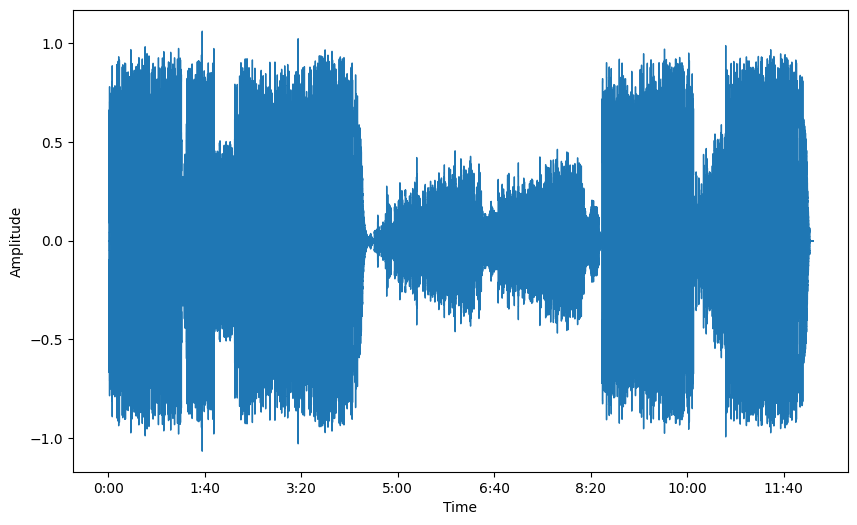

In [3]:
# # Display the waveform
plt.figure(figsize=(10, 6))
librosa.display.waveshow(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


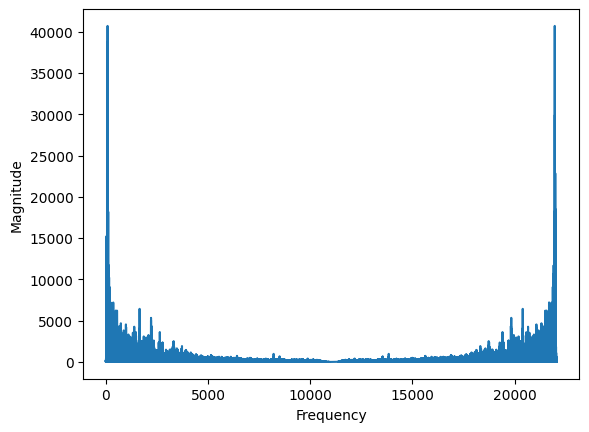

In [4]:
#fft -> spectrum
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()


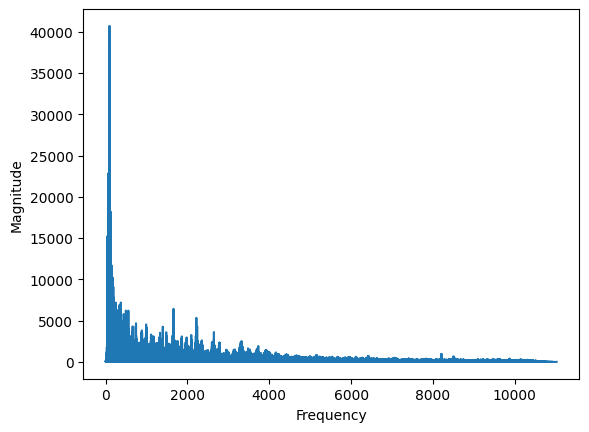

In [5]:
#focusing on the first half of the plot
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

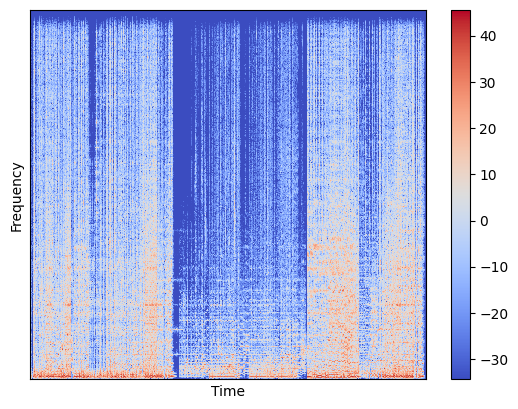

In [6]:
# stft -> spectrogram
n_fft = 2048
hop_length = 512
stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)

spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()


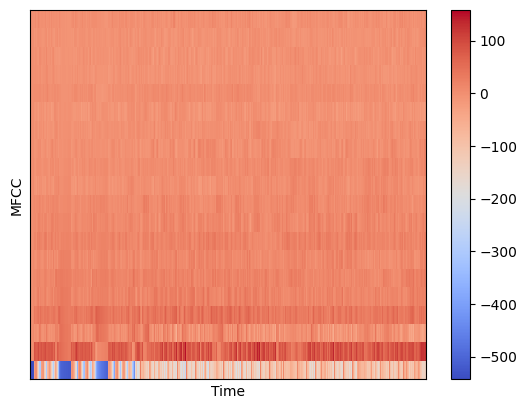

(20, 1292)


In [30]:
# MFCCs

MFCCs = librosa.feature.mfcc(y=signal[0:30*sr], n_fft=n_fft, hop_length=hop_length)

librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

print(MFCCs.shape)

In [33]:
print(MFCCs[:1])

[[-543.19086  -543.19086  -543.19086  ... -139.66014   -78.13184
   -12.837173]]


In [9]:
# DATA_PATH = "CAP6610SP24_training_set"
# SAMPLE_RATE = 22050
# JSON_PATH = "data.json"
# DURATION = 30 # measured in seconds
# SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

# def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):

#     #Dictionary to store data
#     data = {
#         "mapping": [],
#         "mfcc": [],
#         "labels": []
#     }

#     num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
#     expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)

#     # loop through all the genres
#     for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

#         # ensure we're not at the root level
#         if dirpath is not dataset_path:
#             # save the semantic label
#             dirpath_components = dirpath.split("/")
#             semantic_label = dirpath_components[-1]
#             data["mapping"].append(semantic_label)
#             print("\nProcessing {}".format(semantic_label))

#             # process files for a specific genre
#             for f in filenames:
#                 file_path = os.path.join(dirpath, f)
#                 signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

#                 # process segments extracting mfcc and storing data
#                 for s in range(num_segments):
#                     start_sample = num_samples_per_segment * s
#                     finish_sample = start_sample + num_samples_per_segment

#                     mfcc = librosa.feature.mfcc(y=signal[start_sample:finish_sample],
#                                                 sr=sr,
#                                                 n_fft=n_fft,
#                                                 n_mfcc=n_mfcc,
#                                                 hop_length=hop_length)
#                     mfcc = mfcc.T

#                     # store mfcc for segment if it has the expected length
#                     if len(mfcc) == expected_num_mfcc_vectors_per_segment:
#                         data["mfcc"].append(mfcc.tolist())
#                         data["labels"].append(i-1)
#                         print("{}, segment:{}".format(file_path, s+1))
        
#     with open(json_path, "w") as fp:
#         json.dump(data, fp, indent=4)


# save_mfcc(DATA_PATH, JSON_PATH, num_segments=10)
    
        


In [10]:
DATA_PATH = "CAP6610SP24_training_set"
SAMPLE_RATE = 22050
JSON_PATH = "data.json"
DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

min_duration = 30 
fixed_sample_rate = 22050
current_working_directory = os.getcwd()
SAMPLES_PER_TRACK = fixed_sample_rate * min_duration

base_path = current_working_directory + '/CAP6610SP24_training_set/'
prog_path = base_path + 'Progressive_Rock_Songs/'
non_prog_path = base_path + 'Not_Progressive_Rock/'

hop_length=512
num_segments=10

num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)

def fileList(path):
    matches = glob.glob(path + '/**/*', recursive=True)
    files = [file for file in matches if os.path.isfile(file) and file.endswith(('.wav', '.mp3', '.avi', '.flac', '.ogg', '.m4a', '.wma', '.mp4'))]
    return files

prog_files = fileList(prog_path)
non_prog_files = fileList(non_prog_path)

def get_prog_files():
    return prog_files

def get_non_prog_files():
    return non_prog_files

prog_files = get_prog_files()
non_prog_files = get_non_prog_files()

data = {
    "mapping": [],
    "mfcc": [],
    "labels": []
}

genre = "prog"
data["mapping"].append(genre)
count = 0
# time_series_length = 30


for i in range (len(prog_files)):
    filename = prog_files[i]
    name = (filename.split('/')[-1]).replace(" ", "_")

    try: 
        y, sr = librosa.load(filename, sr=fixed_sample_rate)
        time = librosa.get_duration(y=y, sr=sr)
        chunks = []
        if time > min_duration:
            org_y = y
            iter = math.floor (time /min_duration)
            print(iter)
            current_size = time*fixed_sample_rate
            chunk_size = min_duration*fixed_sample_rate
            start = 0
            end = chunk_size
            chunk_index = 1

            while iter !=0: 
                count += 1
                chunk = y[start:end]
                mfcc = librosa.feature.mfcc(y=chunk,
                                            sr=sr,
                                            n_fft=n_fft,
                                            n_mfcc=20,
                                            hop_length=hop_length)
                mfcc = mfcc.T
                chunk_index += 1
                # if len(mfcc) == expected_num_mfcc_vectors_per_segment:
                data["mfcc"].append(mfcc.tolist())
                data["labels"].append(1)

                start = end
                end = end + chunk_size
                iter -= 1
        else :
            count += 1
            y, sr = librosa.load(filename, sr=fixed_sample_rate)
            mfcc = librosa.feature.mfcc(y=chunk,
                                            sr=sr,
                                            n_fft=2048,
                                            n_mfcc=20,
                                            hop_length=512)
            mfcc = mfcc.T
            # if len(mfcc) == expected_num_mfcc_vectors_per_segment:
            data["mfcc"].append(mfcc.tolist())
            data["labels"].append(1)

    
    except Exception as e:
        print('error handled')
        continue


print('processing non prog files')

genre = "non-prog"
data["mapping"].append(genre)
count = 0
# time_series_length = 30


for i in range (len(non_prog_files)):
    filename = non_prog_files[i]
    name = (filename.split('/')[-1]).replace(" ", "_")

    try: 
        y, sr = librosa.load(filename, sr=fixed_sample_rate)
        time = librosa.get_duration(y=y, sr=sr)
        chunks = []
        if time > min_duration:
            org_y = y
            iter = math.floor (time /min_duration)
            print(iter)
            current_size = time*fixed_sample_rate
            chunk_size = min_duration*fixed_sample_rate
            start = 0
            end = chunk_size
            chunk_index = 1

            while iter !=0: 
                count += 1
                chunk = y[start:end]
                mfcc = librosa.feature.mfcc(y=chunk,
                                            sr=sr,
                                            n_fft=n_fft,
                                            n_mfcc=20,
                                            hop_length=hop_length)
                mfcc = mfcc.T
                chunk_index += 1
                # if len(mfcc) == expected_num_mfcc_vectors_per_segment:
                data["mfcc"].append(mfcc.tolist())
                data["labels"].append(0)


                start = end
                end = end + chunk_size
                iter -= 1
        else :
            count += 1
            y, sr = librosa.load(filename, sr=fixed_sample_rate)
            mfcc = librosa.feature.mfcc(y=chunk,
                                            sr=sr,
                                            n_fft=2048,
                                            n_mfcc=20,
                                            hop_length=512)
            mfcc = mfcc.T
            # if len(mfcc) == expected_num_mfcc_vectors_per_segment:
            data["mfcc"].append(mfcc.tolist())
            data["labels"].append(0)

    
    except Exception as e:
        print('error handled')
        continue

with open('data.json', "w") as fp:
        json.dump(data, fp, indent=4)

                 

24
17
17
21
17
14
17
45
15
39
17
33
17
48
24


Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 20630146.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


17
25
13
13
35
41
35
17
15
16
33


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


17
10
45
34
24
17
18
16
51
18
49
28
27
41
20
15
41
7
46
13
87
14
8
8
20
27
22
31


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


18
9
19
14
24
27
13
25
21
15
7
17
23
40
16
33
22
53
19
18
10
41
21
21
8
37
13


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


46
60
11
34
46
50
12
8
19
16
60
32
11
18
46
17
14
11
13
31
14
3
18


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


12
9
14
25
11
14


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


15
7
31
14
40
10
19
17
9
20
38
20
23
8
15
26
19
43
24
19
21
13
23
41
8
14
22
17
9


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


16
45
11
processing non prog files
6
12
8


/var/folders/m0/0p062cxn2rvbyqh1m3h8cb4c0000gn/T/ipykernel_57705/2952383791.py:118: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename, sr=fixed_sample_rate)
[src/libmpg123/layer3.c:INT123_do_layer3():1801] error: dequantization failed!
Note: Illegal Audio-MPEG-Header 0x4f09842e at offset 3049050.
Note: Trying to resync...
Note: Skipped 1024 bytes in input.
[src/libmpg123/parse.c:wetwork():1365] error: Giving up resync after 1024 bytes - your stream is not nice... (maybe increasing resync limit could help).
/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


2


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


7
7


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


4
6


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


6
6
7
17


Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 7797061.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


6
6
12
6
5
11
9
10
7
11
7
6
14


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 2806046.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


5
6
6
5
7
11
7
11
4
8
13
8
7
13
4
6
9
8
11
4
8
6
7
9
11
8


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


5
7
5
8
7
5
5
7
8


Note: Illegal Audio-MPEG-Header 0x00544147 at offset 3412749.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


7
6
6
9
6
7
1


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


6


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


10


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?
Note: Illegal Audio-MPEG-Header 0x42696c6c at offset 3302120.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


4
8
5
6
4


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


8
7
7
6
5
11
7
7


Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 8066079.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


11
5


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 5460065.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


7
7
5
7
6
3
14
10
8
26


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


9


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


6
6
10
6
12
11
7
8


Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 8933388.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


7
7
4
5
7
17
7
18
8
10
6
6
11
7
8
9
20
4
19
10
5
6
12
6
4
10
8
4
34
15
13
8
7
11
9
8
6
7
15
7
5
13
3
13


Note: Illegal Audio-MPEG-Header 0x040cfffb at offset 7708883.
Note: Trying to resync...
Note: Skipped 2 bytes in input.
[src/libmpg123/layer3.c:INT123_do_layer3():1801] error: dequantization failed!
Note: Illegal Audio-MPEG-Header 0xb0049200 at offset 7710137.
Note: Trying to resync...
Note: Skipped 285 bytes in input.


10
6
6
7
9
10
12
8
12
5
7
8
7
11
8
15
8


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


13


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


13
14
6
10
6
9
7
13
12
6
9
4
6
5
5


[src/libmpg123/layer3.c:INT123_do_layer3():1801] error: dequantization failed!
Note: Illegal Audio-MPEG-Header 0x00000000 at offset 8848353.
Note: Trying to resync...
Note: Skipped 1024 bytes in input.
[src/libmpg123/parse.c:wetwork():1365] error: Giving up resync after 1024 bytes - your stream is not nice... (maybe increasing resync limit could help).


9
6
19
17
4
8
7
7
9
8
8
8
9
5
8
5
12
8
5


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


6
10
9
6
6
18
5


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


5
8
7
8
4
10
6
7
6
7
10
7
9
6
3
7
8
12
8
5
5
9
10
6
7
9
7
9
5


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 10147253.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


8
8


Note: Illegal Audio-MPEG-Header 0x46656174 at offset 5182435.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


7
8
7
5
7
15
12
11
29
7
5
10


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


10
7


Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 18882356.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


15
15
8
5
6
19
9
14
9


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


9
7
5
7
12
8
20
9
8
17
8
8
9
8
5
8
7
10
28
7
8
11
7
8
6
4


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


6
12
8
14
9
10
9
11
9
9
15
8
4
10
7
7
5
5
9
7
10
6
7
8
12
6
7
9


Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 10880470.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


8
10
5
11
16
7
9
6
9
8
6
8
9
6
15
5
10
22
6
8


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 10986313.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


9
9
14
16
10
6
4
4
18
9
6
6
7
14
8
6
15
6
9
7
12
10
8
7
10


In [11]:
mfcc.shape

(1292, 20)

### Implementing the neural netowrk

In [37]:
# neural network

with open ("data.json", "r") as fp:
    data = json.load(fp)

inputs = np.array(data["mfcc"])
targets = np.array(data["labels"])


from sklearn.model_selection import train_test_split

inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.3)



: 

In [36]:
print(inputs.shape)
print(targets.shape)

(6370, 1292, 20)
(6370,)


In [34]:
# build the network architecture
def plot_history(history):
    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

import tensorflow.keras as keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

#compile the network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# train the network
history = model.fit(inputs_train, targets_train,
                    validation_data=(inputs_test, targets_test),
                    epochs=100,
                    batch_size=32)

plot_history(history)



/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 25840)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │    13,230,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,307,265 (50.76 MB)

 Trainable params: 13,307,265 (50.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


2024-04-30 17:49:26.161706: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1
2024-04-30 17:49:26.161742: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1
	 [[{{function_node __inference_one_step_on_data_622268}}{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/Users/harlow/miniconda3/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/Users/harlow/miniconda3/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/Users/harlow/miniconda3/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/var/folders/m0/0p062cxn2rvbyqh1m3h8cb4c0000gn/T/ipykernel_57705/3627015566.py", line 50, in <module>

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 314, in fit

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 117, in one_step_on_iterator

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 104, in one_step_on_data

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/keras/src/trainers/trainer.py", line 316, in compute_loss

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/keras/src/trainers/compile_utils.py", line 609, in __call__

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/keras/src/trainers/compile_utils.py", line 645, in call

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/keras/src/losses/loss.py", line 43, in __call__

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/keras/src/losses/losses.py", line 22, in call

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/keras/src/losses/losses.py", line 1722, in sparse_categorical_crossentropy

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/keras/src/ops/nn.py", line 1567, in sparse_categorical_crossentropy

  File "/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py", line 638, in sparse_categorical_crossentropy

Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_622381]

### Implementing CNN

In [24]:
DATA_PATH = "data.json"

def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)

    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    return inputs, targets

def prepare_datasets(test_size, validation_size):
    # load data
    inputs, targets = load_data(DATA_PATH)

    # create train/test split
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=test_size)

    # create train/validation split
    inputs_train, inputs_validation, targets_train, targets_validation = train_test_split(inputs_train, targets_train, test_size=validation_size)

    inputs_train = inputs_train[..., np.newaxis]
    inputs_validation = inputs_validation[..., np.newaxis]
    inputs_test = inputs_test[..., np.newaxis]

    return inputs_train, inputs_validation, inputs_test, targets_train, targets_validation, targets_test


def build_model(input_shape):

    #create model
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten the output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(2, activation='sigmoid'))

    return model


def predict (model, X, y):
    X = X[np.newaxis, ...]
    prediction = model.predict(X)

    predicted_index = np.argmax(prediction, axis=1)
    print("Expected index: {}, Predicted index: {}".format(y, predicted_index))

In [25]:
# create train test split
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)


#build the CNN network
inputs_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
model = build_model(inputs_shape)


# compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train network
model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

# evaluate network on test
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy on test set is: {test_accuracy}")


Epoch 1/50


ValueError: Exception encountered when calling Conv2D.call().

[1mNegative dimension size caused by subtracting 2 from 1 for '{{node sequential_4_1/conv2d_10_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_4_1/batch_normalization_8_1/batchnorm/add_1, sequential_4_1/conv2d_10_1/convolution/ReadVariableOp)' with input shapes: [?,160,1,32], [2,2,32,32].[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(None, 160, 1, 32), dtype=float32)

In [16]:

# make prediction on a sample
X = X_test[10]
y = y_test[10]

predict(model, X, y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Expected index: 1, Predicted index: [1]


#### Copying some code from CNN and implementing a RNN-LSTM Network

In [17]:
DATA_PATH = "data.json"

def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)

    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    return inputs, targets

def prepare_datasets(test_size, validation_size):
    # load data
    inputs, targets = load_data(DATA_PATH)

    # create train/test split
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=test_size)

    # create train/validation split
    inputs_train, inputs_validation, targets_train, targets_validation = train_test_split(inputs_train, targets_train, test_size=validation_size)

    return inputs_train, inputs_validation, inputs_test, targets_train, targets_validation, targets_test


def build_model(input_shape):

    #create model RNN-LSTM
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    


    # output layer
    model.add(keras.layers.Dense(2, activation='sigmoid'))

    return model


def predict (model, X, y):
    X = X[np.newaxis, ...]
    prediction = model.predict(X)

    predicted_index = np.argmax(prediction, axis=1)
    print("Expected index: {}, Predicted index: {}".format(y, predicted_index))

/Users/harlow/.local/share/virtualenvs/Harshit-ikHQR9cv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1292, 64)       │        21,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,074 (230.76 KB)

 Trainable params: 59,074 (230.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 71s 584ms/step - accuracy: 0.4934 - loss: 0.7049 - val_accuracy: 0.5397 - val_loss: 0.6903
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 74s 612ms/step - accuracy: 0.5403 - loss: 0.6856 - val_accuracy: 0.5387 - val_loss: 0.6852
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 76s 633ms/step - accuracy: 0.5794 - loss: 0.6820 - val_accuracy: 0.5638 - val_loss: 0.6784
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 76s 633ms/step - accuracy: 0.6002 - loss: 0.6680 - val_accuracy: 0.5680 - val_loss: 0.6732
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 75s 621ms/step - accuracy: 0.6119 - loss: 0.6570 - val_accuracy: 0.6004 - val_loss: 0.6639
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 74s 620ms/step - accuracy: 0.6395 - loss: 0.6373 - val_accuracy: 0.5962 - val_loss: 0.6620
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 74s 619ms/step - accuracy: 0.6433 - loss: 0.6342 - val_accuracy: 0.6172 - val_loss: 0.6535
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 74s 617ms/step - accuracy: 0.6683 - loss: 0

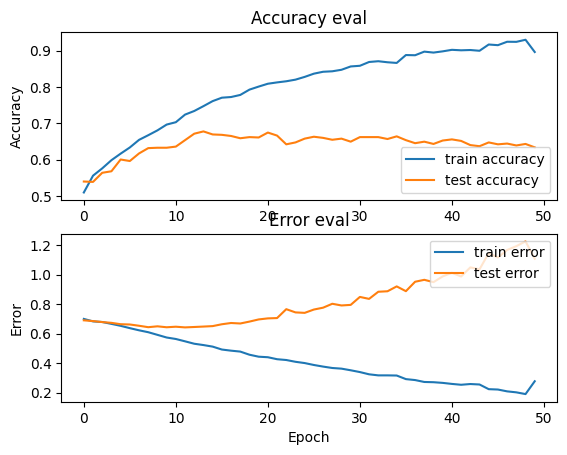

50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.6469 - loss: 1.0299
Accuracy on test set is: 0.6453232765197754


In [18]:
# create train test split
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)


#build the CNN network
inputs_shape = (X_train.shape[1], X_train.shape[2])
model = build_model(inputs_shape)


# compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# train network
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

#plot accuracy/error for training and validation
plot_history(history)

# evaluate network on test
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy on test set is: {test_accuracy}")


In [21]:
print(inputs.shape, targets.shape)

(6370, 1292, 20) (6370,)
